## 1. Data Setup and Exploring

##### • Importing Libraries
Importing the essential libraries needed for data manipulation, visualization, and analysis

In [5]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV

#### • Reading the Data
Load the dataset into a Pandas DataFrame.

In [6]:
train_data=pd.read_csv('train.csv')
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


#### • Understanding the Shape of the Data
Check the number of rows and columns in the dataset to understand its dimensions.


In [7]:
def shape(data):
    return f'This data contains {data.shape[0]} rows and {data.shape[1]} columns.'
print(shape(train_data))

This data contains 20758 rows and 18 columns.


#### •Checking for Null Values
Inspect the dataset for missing values


In [8]:
def check_null(data):
    if data.isnull().sum().sum()!=0:
        print('The data contain null values that are distributed as follows:')
        return data.isnull().sum()
    else:
        return 'There are no missing values in this data.'
print(check_null(train_data))

There are no missing values in this data.


#### • Checking for Duplicate Rows
Identify duplicate entries if present.


In [9]:
def check_duplicates(data):
    if data.duplicated().sum().sum()!=0:
        return f'The data contains {data.duplicated.sum().sum()} duplicated records.'
    else:
        return 'There are no duplicated records in this data.'
print(check_duplicates(train_data))

There are no duplicated records in this data.


#### • Viewing Summary Statistics
Use the describe() function to get a statistical summary of the numerical columns.


In [10]:
def statistics(data):
    return data.describe()
statistics(train_data)

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


#### • Dataset Overview Using info()
A concise summary of column names, data types, non-null counts, and memory usage.

In [12]:
def info(data):
    return data.info()
info(train_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

#### • Categorizing Columns
Separate the dataset into categorical, continuous, and discrete variables.

In [13]:
dicrete_col=[col for col in train_data.columns if train_data[col].dtype=='int64']
continuous_col=[col for col in train_data.columns if train_data[col].dtype=='float64']
categorical_col=[col for col in train_data.columns if train_data[col].dtype=='object']

#### • Distribution of Obesity Levels in the Dataset
The analysis of the target column (NObeyesdad) and its distribution across various obesity levels.

In [11]:
def series_distribution(data,target):
   return data[target].value_counts()
series_distribution(train_data,'NObeyesdad')

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

## 2. **Data Visualizing**

#### • Pie Chart of Obesity Categories: 
Visual representation of the proportion of each NObeyesdad category.

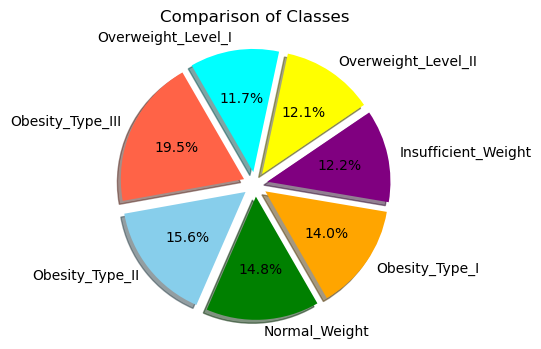

In [14]:
target='NObeyesdad'
classes=train_data[target].value_counts()
labels = classes.index
plt.figure(figsize=(4,4))
plt.pie(classes,labels=labels,autopct='%1.1f%%',startangle=120,shadow = True,
        explode = [0.1] * len(classes),
        colors=['tomato', 'skyblue', 'green', 'orange', 'purple', 'yellow', 'cyan']
       )
plt.title('Comparison of Classes')
plt.show()

#### •Crosstab Plots for Categorical Features by NObeyesdad
Visualizations of the count distribution of NObeyesdad across key categorical features:
Gender, Smoking Habit (SMOKE), Family History with Overweight, Frequent Consumption of Food with High Caloric Value (FAVC), Consumption of Alcohol (CALC), Frequency of Eating (CAEC), SCC (Monitoring Caloric Consumption), Preferred Mode of Transport (MTRANS)

In [15]:
def crosstab_plot(data,target,column,colors):
    plt.figure(figsize=(8,8))
    crosstab=pd.crosstab(columns=data[column],index=data[target])
    crosstab.plot(kind='bar',color=colors,
              legend=True,stacked=True)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count of {column} by NObeyesdad')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

<Figure size 800x800 with 0 Axes>

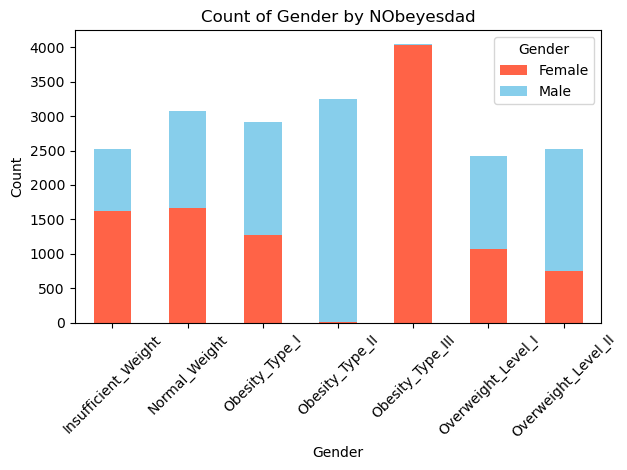

<Figure size 800x800 with 0 Axes>

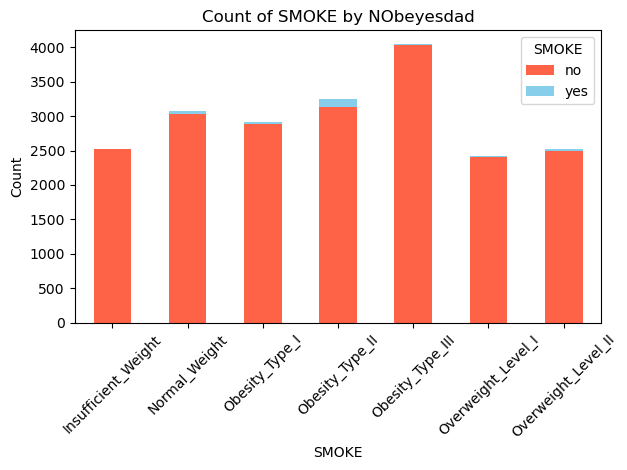

<Figure size 800x800 with 0 Axes>

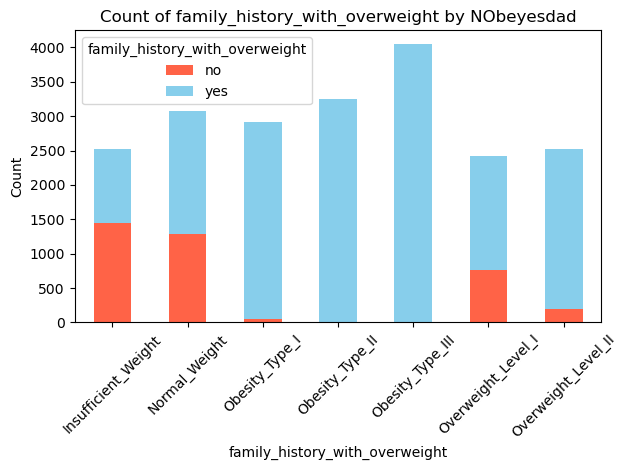

<Figure size 800x800 with 0 Axes>

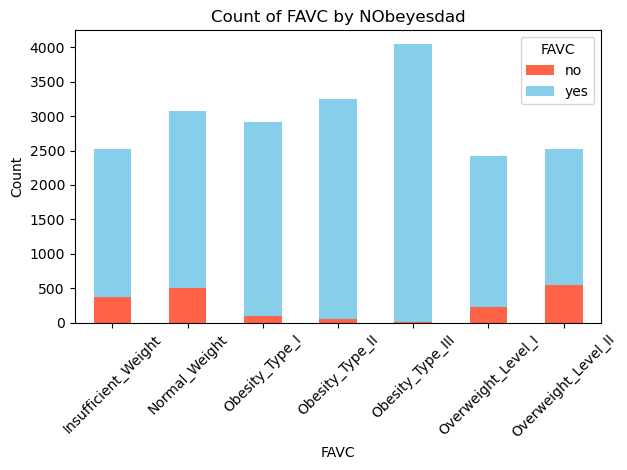

<Figure size 800x800 with 0 Axes>

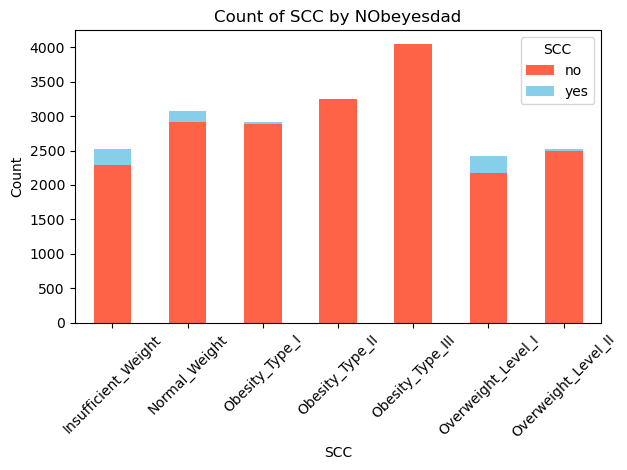

<Figure size 800x800 with 0 Axes>

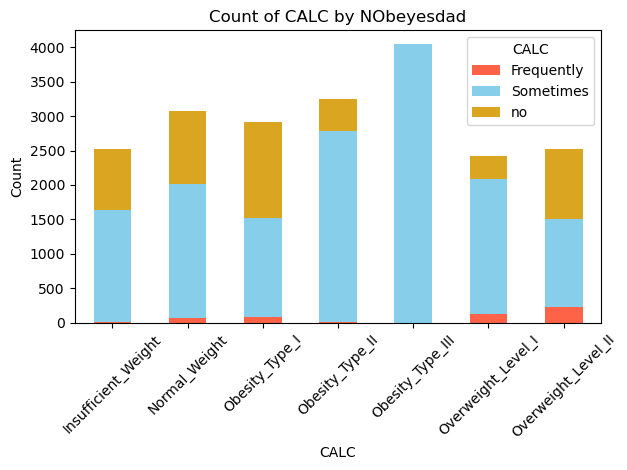

<Figure size 800x800 with 0 Axes>

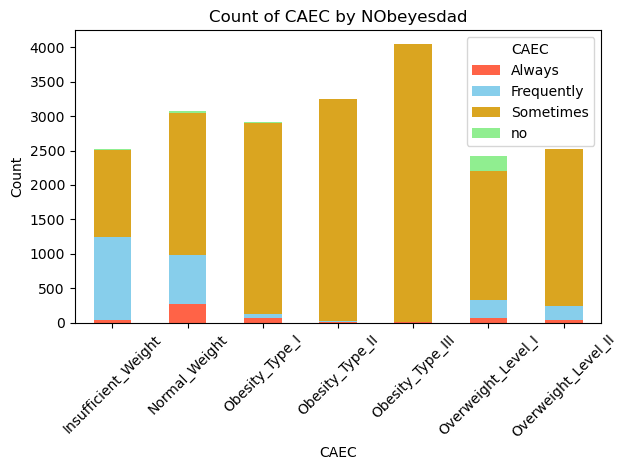

<Figure size 800x800 with 0 Axes>

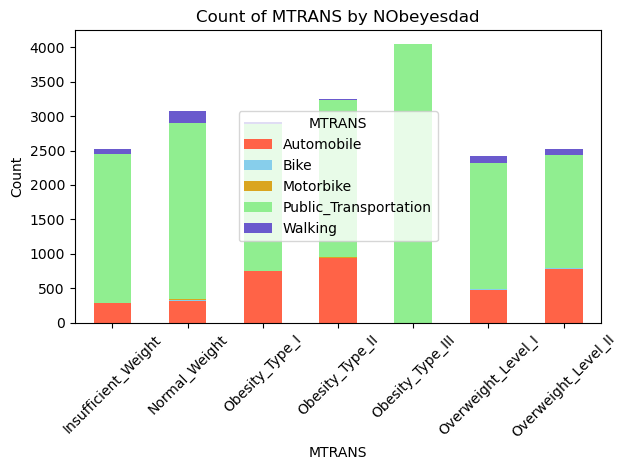

In [16]:
crosstab_plot(train_data,target,'Gender',['tomato','skyblue'])
crosstab_plot(train_data,target,'SMOKE',['tomato','skyblue'])
crosstab_plot(train_data,target,'family_history_with_overweight',['tomato','skyblue'])
crosstab_plot(train_data,target,'FAVC',['tomato','skyblue'])
crosstab_plot(train_data,target,'SCC',['tomato','skyblue'])
crosstab_plot(train_data,target,'CALC',['tomato','skyblue','goldenrod'])
crosstab_plot(train_data,target,'CAEC',['tomato','skyblue','goldenrod', 'lightgreen'])
crosstab_plot(train_data,target,'MTRANS',['tomato','skyblue','goldenrod', 'lightgreen', 'slateblue'])

#### • Violin Plot of Age: 
Visualizing the distribution of age by NObeyesdad categories, further grouped by gender.


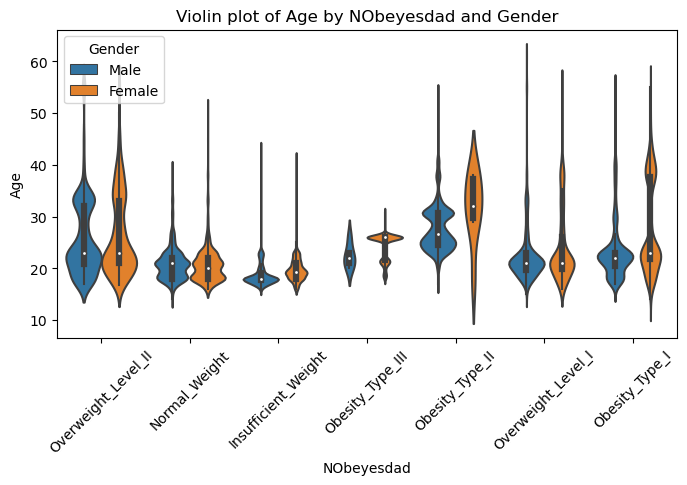

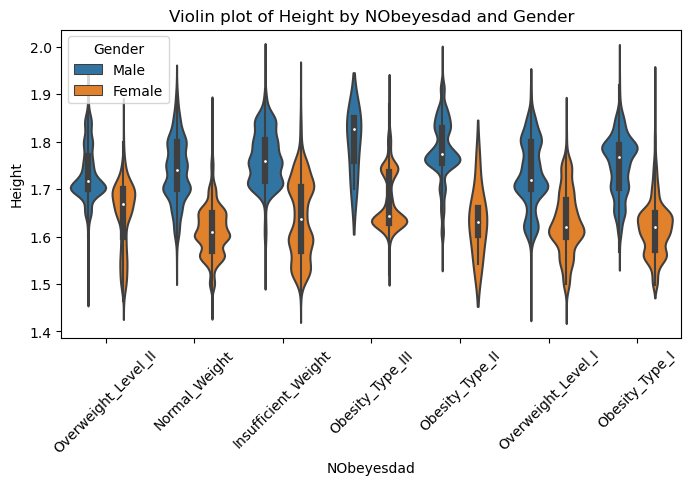

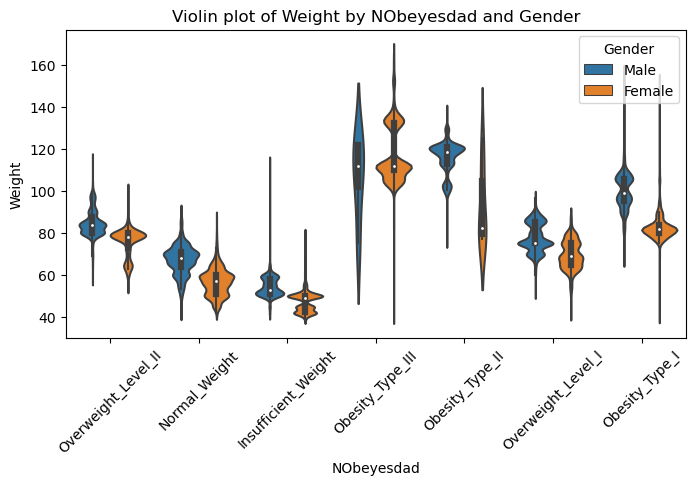

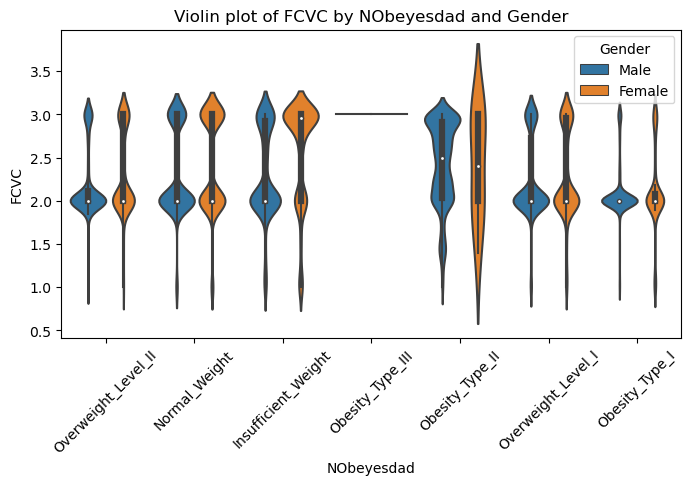

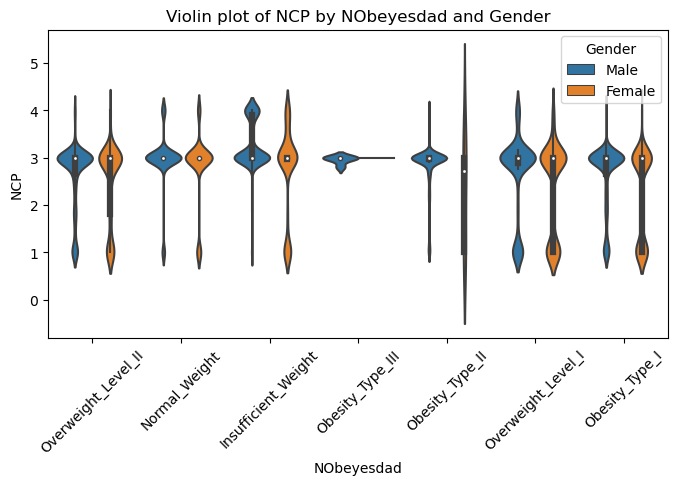

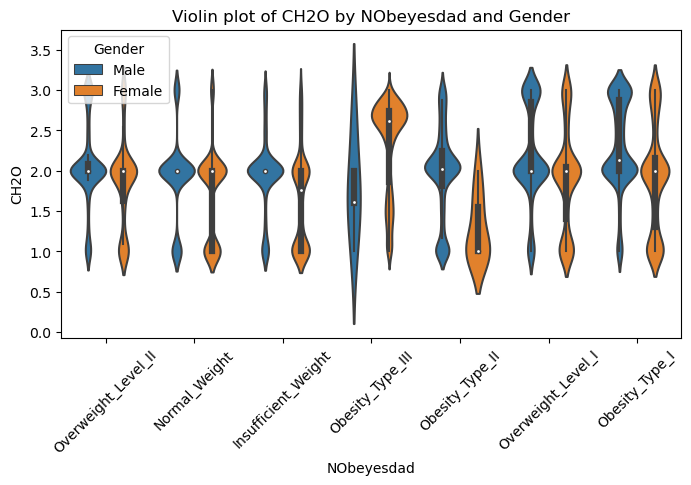

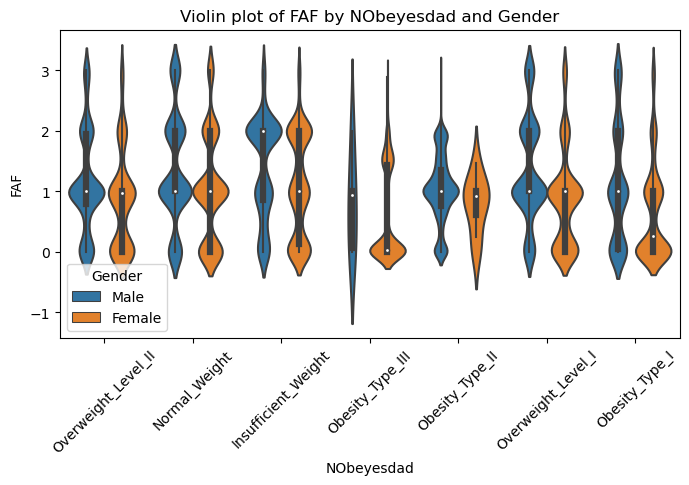

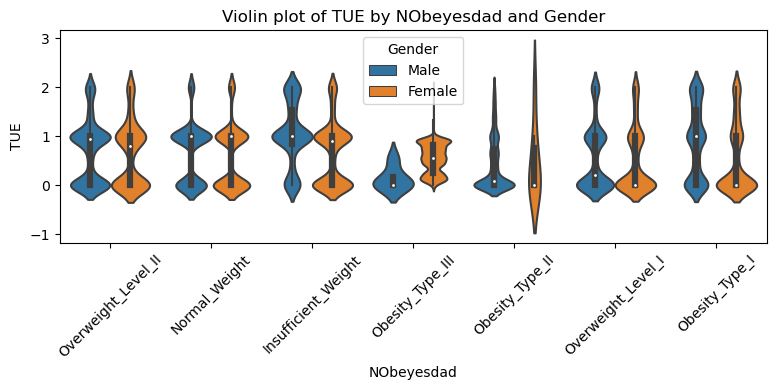

In [17]:
for col in continuous_col:
    plt.figure(figsize=(8,4)) 
    sns.violinplot(x=target, y=col, hue="Gender", data=train_data, split=False)
    plt.title(f'Violin plot of {col} by {target} and Gender')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### • Histogram by Obesity Groups:
Comparison of train_data, obese_group and non_obese_group distributions.

In [18]:
def histo_plot(data):
    plt.figure(figsize=(10,10))
    for i, column in enumerate(continuous_col):
      plt.subplot(4, 2, i + 1)
      sns.histplot(data[column], bins=15, kde=True, edgecolor='black')
      plt.xlabel('Values')
      plt.ylabel('Count')
      plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()
    

In [19]:
obese_group = ['Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_I']
non_obese_group = ['Normal_Weight', 'Insufficient_Weight', 'Overweight_Level_II', 'Overweight_Level_I']
obese_group = ['Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_I']
non_obese_group = ['Normal_Weight', 'Insufficient_Weight', 'Overweight_Level_II', 'Overweight_Level_I']
obese_data = train_data[train_data['NObeyesdad'].isin(obese_group)]
non_obese_data = train_data[train_data['NObeyesdad'].isin(non_obese_group)]

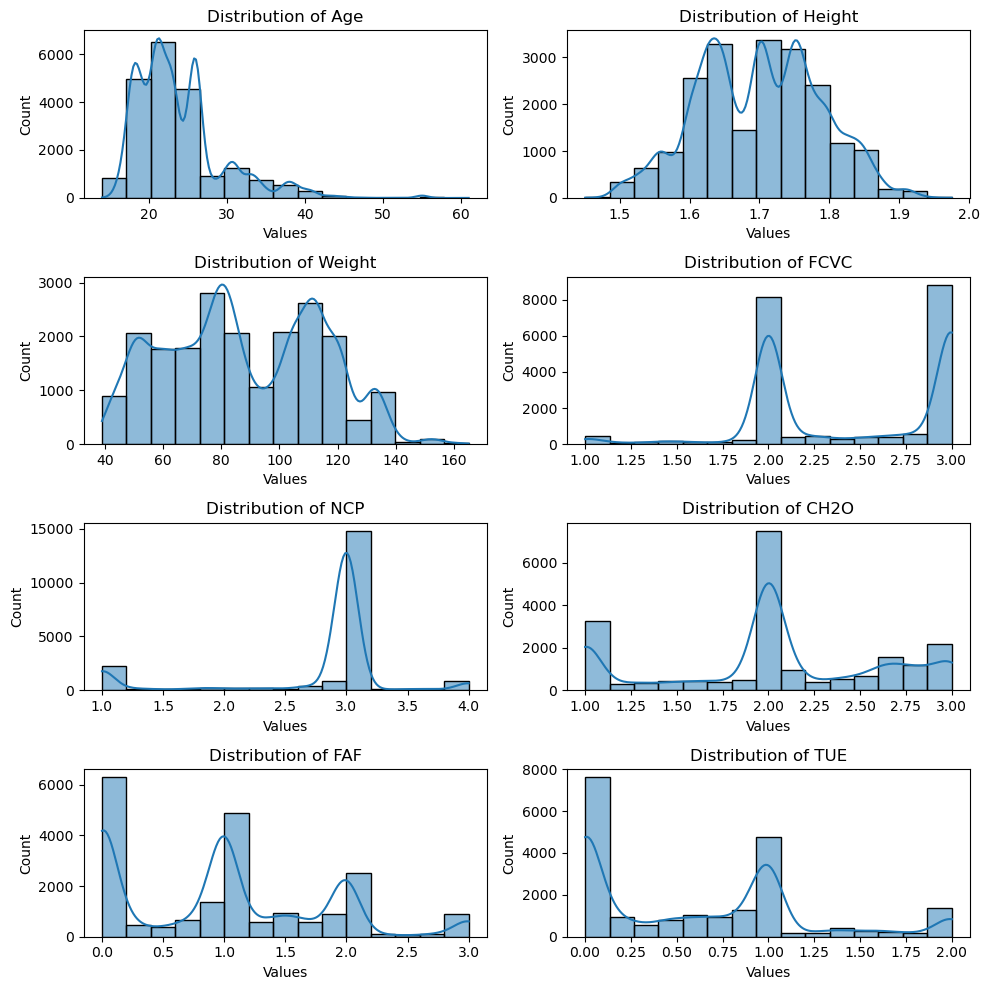

In [20]:
histo_plot(train_data)

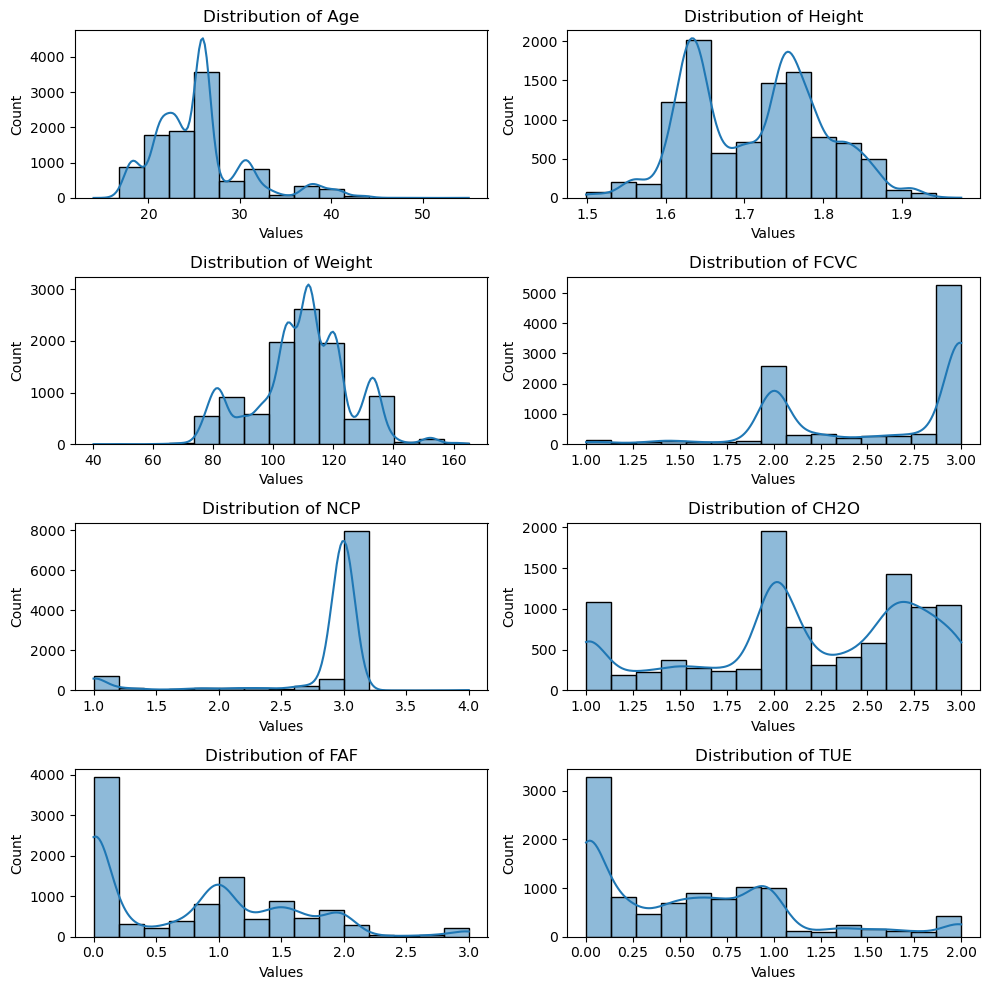

In [21]:
histo_plot(obese_data)

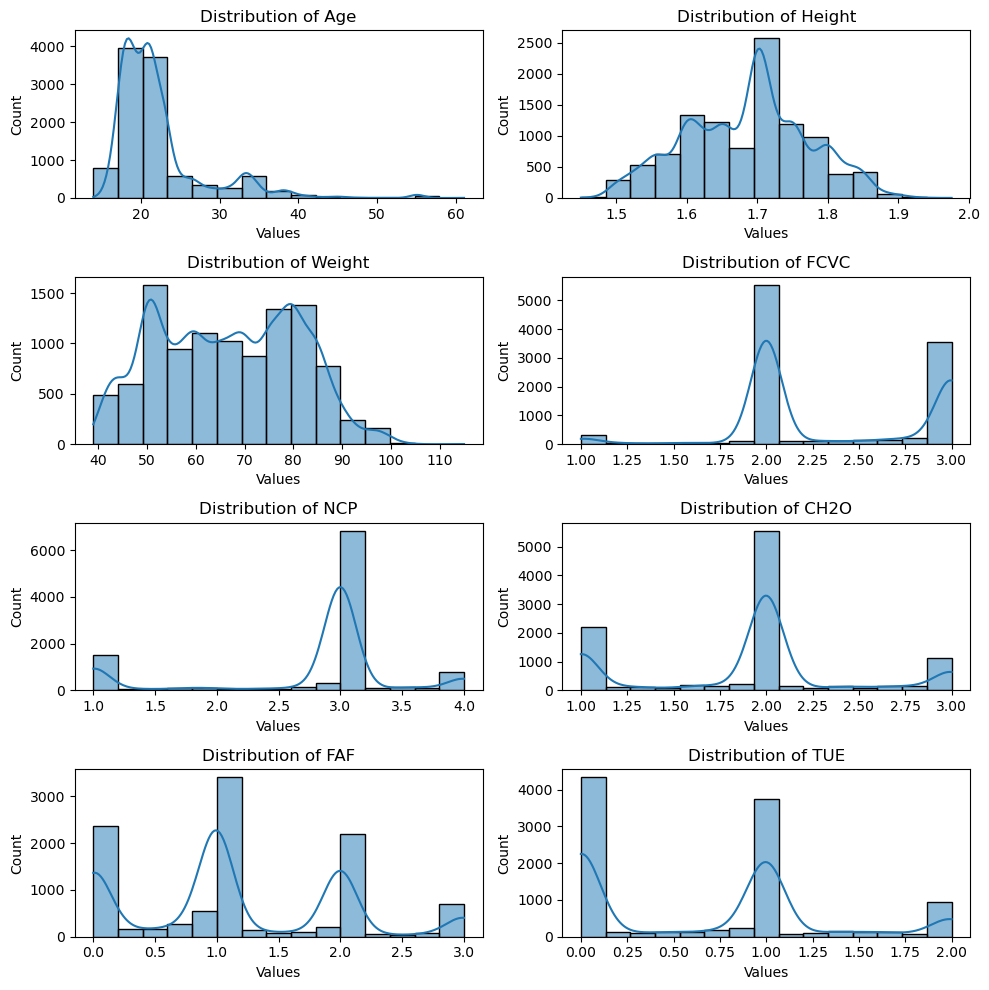

In [22]:
histo_plot(non_obese_data)

#### • Correlation Matrix: 
Heatmap showing relationships between continuous and discrete features.

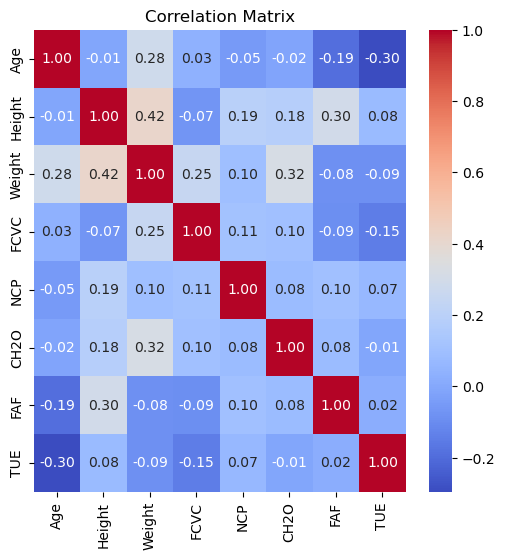

In [23]:
correlation_matrix = train_data[continuous_col].corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix')
plt.show()

## 3.**Data Preprocessing**

Encoding categorical features, scaling numerical data, and splitting into training and testing sets for model preparation.

In [24]:
encoder=LabelEncoder()
def encode(data,columns_list):
    for column in categorical_col:
        data[column]=encoder.fit_transform(data[column])
encode(train_data,categorical_col)

In [25]:
scaler=MinMaxScaler((-1,1))
def scale(x):
    scaled_x=scaler.fit_transform(x)
    return scaled_x

In [26]:
x=scale(train_data.drop(['id','NObeyesdad'],axis=1).values)
y=train_data['NObeyesdad'].values

In [27]:
seed=42
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=seed)

## 4. **Modeling**

Training machine learning models to predict obesity risk (NObeyesdad) based on the preprocessed data.

In [28]:
parameters = {
    'LogisticRegression': {
        'C': [0.1, 1, 5, 10, 50, 100],
        'penalty': ['l1', 'l2']
    },
    'SVC': {
        'C': [0.1, 1, 2, 5, 10, 15, 25],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 210, 250, 300, 350, 400]
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 150, 170, 200, 230, 250, 300]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
        'learning_rate': [0.01, 0.1, 0.5, 1,1.5, 2]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 10, 15, 20, 30,35,40],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'XGBClassifier': {
        'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
        'n_estimators': [50, 100, 150, 200, 250, 300, 350]
    }
}

In [29]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier(),
}

In [32]:
results =list()
for model_name, model in models.items():
    print(f"Grid searching for {model_name}")
    param_grid = parameters[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(x_train,y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_
    
    results.append({'Model': model_name, 'Best Params': best_params, 'Best Accuracy': best_accuracy})
results_df= pd.DataFrame(results)

Grid searching for LogisticRegression
Grid searching for SVC
Grid searching for DecisionTreeClassifier
Grid searching for RandomForestClassifier
Grid searching for AdaBoostClassifier
Grid searching for KNeighborsClassifier
Grid searching for XGBClassifier


In [33]:
results_df.head()

,Model,Best Params,Best Accuracy
0,LogisticRegression,"{'C': 100, 'penalty': 'l2'}",0.858786
1,SVC,"{'C': 10, 'kernel': 'rbf'}",0.867819
2,DecisionTreeClassifier,{'max_depth': 10},0.871312
3,RandomForestClassifier,{'n_estimators': 200},0.899193
4,AdaBoostClassifier,"{'learning_rate': 2, 'n_estimators': 350}",0.587614


In [34]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
styled_df = results_df.head().style.apply(highlight_max, subset=['Best Accuracy'])
styled_df

,Model,Best Params,Best Accuracy
0,LogisticRegression,"{'C': 100, 'penalty': 'l2'}",0.858786
1,SVC,"{'C': 10, 'kernel': 'rbf'}",0.867819
2,DecisionTreeClassifier,{'max_depth': 10},0.871312
3,RandomForestClassifier,{'n_estimators': 200},0.899193
4,AdaBoostClassifier,"{'learning_rate': 2, 'n_estimators': 350}",0.587614


In [35]:
ForestClassifier=RandomForestClassifier(n_estimators=170)
ForestClassifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=170)

In [36]:
y_pred=ForestClassifier.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8964354527938343
Precision: 0.8968148695611567
Recall: 0.8964354527938343
F1 Score: 0.8964964505143352


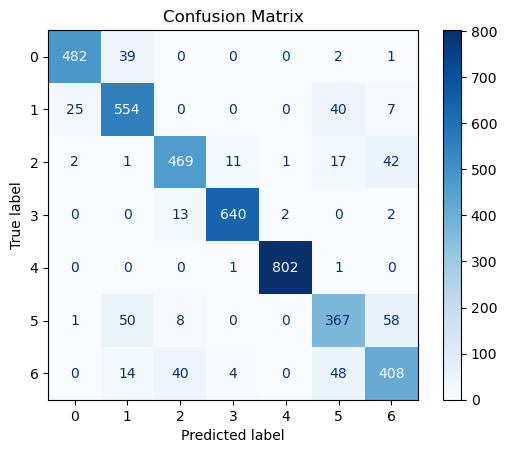

In [37]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ForestClassifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [38]:
test_data=pd.read_csv('test.csv')
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [39]:
categorical_col=[col for col in test_data.columns if test_data[col].dtype=='object']
encode(test_data,categorical_col)

## 5. Predictions

Predicting the Obesity Risk for Test Set Rows


In [40]:
x=scale(test_data.drop(['id'],axis=1).values)
y_hat=ForestClassifier.predict(x)
submission=pd.DataFrame({'id':test_data['id'],'NObeyesdad':y_hat}).astype('int64')
submission.head()

,id,NObeyesdad
0,20758,3
1,20759,5
2,20760,4
3,20761,2
4,20762,4


In [41]:
submission['NObeyesdad']=submission['NObeyesdad'].map(
    {1:'Normal_Weight',5:'Overweight_Level_I',6:'Overweight_Level_II',4:'Obesity_Type_I',
     3:'Obesity_Type_II',2:'Obesity_Type_III',0:'Insufficient_Weight'})

In [42]:
submission.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_I
3,20761,Obesity_Type_III
4,20762,Obesity_Type_I


In [43]:
submission.to_csv('SubmissionData.csv',index=False)